In [1]:
#importing linaries
import os
import numpy as np


In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [55]:
#fetch image count
count = 0
dirs = os.listdir(r'C:\Users\G15\Desktop\4th sem\Machine learning\project\flowers\train')
for dir in dirs:
    files = list(os.listdir(r'C:\Users\G15\Desktop\4th sem\Machine learning\project\flowers\train'+ dir))
    print(dir+ 'floder has ' + str(len(files))+'Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\G15\\Desktop\\4th sem\\Machine learning\\project\\flowers\\traindaisy'

In [23]:
import os

# Specify the base directory containing the training images
base_dir = r'C:\Users\G15\Desktop\4th sem\Machine learning\project\flowers\train'

# Fetch image count for each subdirectory (class) within the base directory
count = 0
dirs = os.listdir(base_dir)
for dir in dirs:
    # Construct the full path to the subdirectory (class) containing the images
    dir_path = os.path.join(base_dir, dir)
    
    # List all files (images) within the current subdirectory
    files = os.listdir(dir_path)
    
    # Print the directory name and the number of images (files) within that directory
    print(f"{dir} folder has {len(files)} images")
    
    # Update the total count of images
    count += len(files)

print("Total number of images:", count)


daisy folder has 764 images
dandelion folder has 1052 images
rose folder has 784 images
sunflower folder has 733 images
tulip folder has 984 images
Total number of images: 4317


In [74]:
# base_dir = 'flowers/'
image_size = (180,180)
batch_size = 32
channels = 3
epochs=20

In [22]:
test_dir = 'flowers/train'

In [25]:
def load_and_preprocess_data(base_dir, img_size, batch_size):
    # Load the original datasets without cache or prefetch
    train_ds_orig = tf.keras.utils.image_dataset_from_directory(
        base_dir,
        seed=123,
        validation_split=0.2,
        subset='training',
        image_size=(img_size, img_size),
        batch_size=batch_size,
        shuffle=True
    )

    val_ds_orig = tf.keras.utils.image_dataset_from_directory(
        base_dir,
        seed=123,
        validation_split=0.2,
        subset='validation',
        image_size=(img_size, img_size),
        batch_size=batch_size,
        shuffle=False
    )

    # Extract class names from the original training dataset
    # This will work before applying transformations
    flower_names = train_ds_orig.class_names

    AUTOTUNE = tf.data.AUTOTUNE
    train_ds = train_ds_orig.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds_orig.cache().prefetch(buffer_size=AUTOTUNE)

    return train_ds, val_ds, flower_names

In [26]:

train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch_size,
                                                       image_size=(image_size,image_size),
                                                       shuffle=True)

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch_size,
                                                       image_size=(image_size,image_size),
                                                       shuffle=False)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [27]:
def load_test_dataset(test_dir, img_size, batch_size):
    test_ds = tf.keras.utils.image_dataset_from_directory(
        test_dir,
        seed=123,
        image_size=(img_size, img_size),
        batch_size=batch_size,
        shuffle=False  # Do not shuffle the test dataset
    )

    return test_ds

In [28]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [29]:
import matplotlib.pyplot as plt

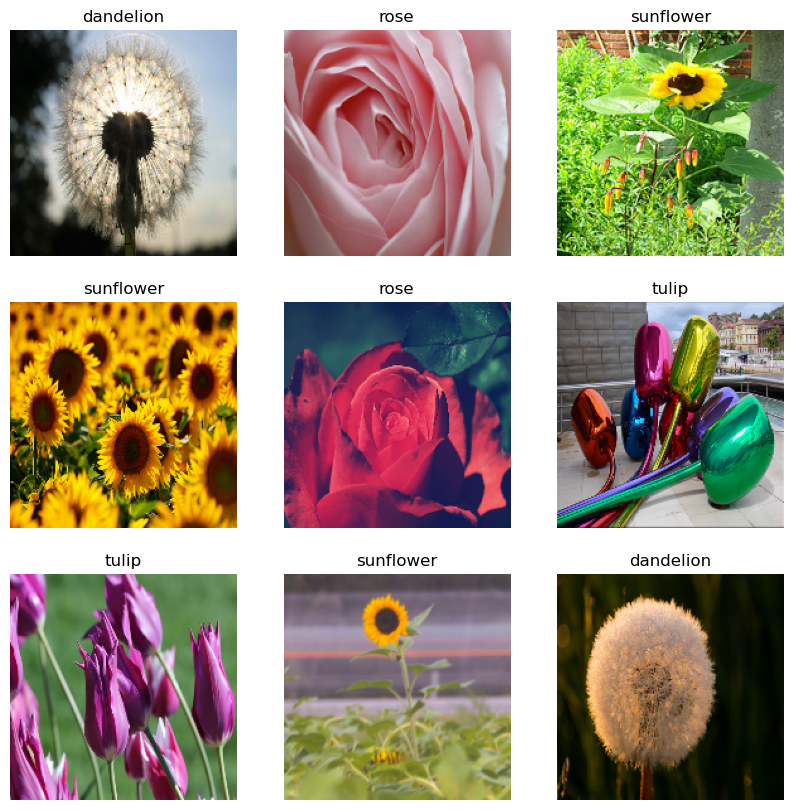

In [53]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [56]:
# Initialize a dictionary to store the count of images for each class
class_counts = {}
folder_path= r'C:\Users\G15\Desktop\4th sem\Machine learning\project\flowers\train'

# Iterate through each subdirectory (each class)
for subdir in os.listdir(folder_path):
    subdir_path = os.path.join(folder_path, subdir)
    if os.path.isdir(subdir_path):
        # Count the number of images in the subdirectory
        num_images = len(os.listdir(subdir_path))
        class_counts[subdir] = num_images


In [57]:
# Display the total number of images in each class
for class_name, count in class_counts.items():
    print(f"Class '{class_name}' has {count} images.")

Class 'daisy' has 764 images.
Class 'dandelion' has 1052 images.
Class 'rose' has 784 images.
Class 'sunflower' has 733 images.
Class 'tulip' has 984 images.


In [75]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\G15\Desktop\4th sem\Machine learning\project\flowers\train',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
)

Found 4317 files belonging to 5 classes.


In [77]:
class_names = dataset.class_names
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [78]:
#se TensorFlow's automatic tuning feature, which dynamically tunes the number of parallel calls to improve data loading performance.
AUTOTUNE = tf.data.AUTOTUNE

In [79]:
#cache(): Caches elements of the dataset in memory after the first epoch, which can improve training speed.
#shuffle(1000): Shuffles the dataset with a buffer size of 1000.
#prefetch(buffer_size=AUTOTUNE): Prefetches batches from the dataset to improve data loading performance by overlapping data preprocessing and model execution.

In [80]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [81]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

## Data Augmentation 

In [36]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (image_size,image_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

C:\Users\G15\anaconda3\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


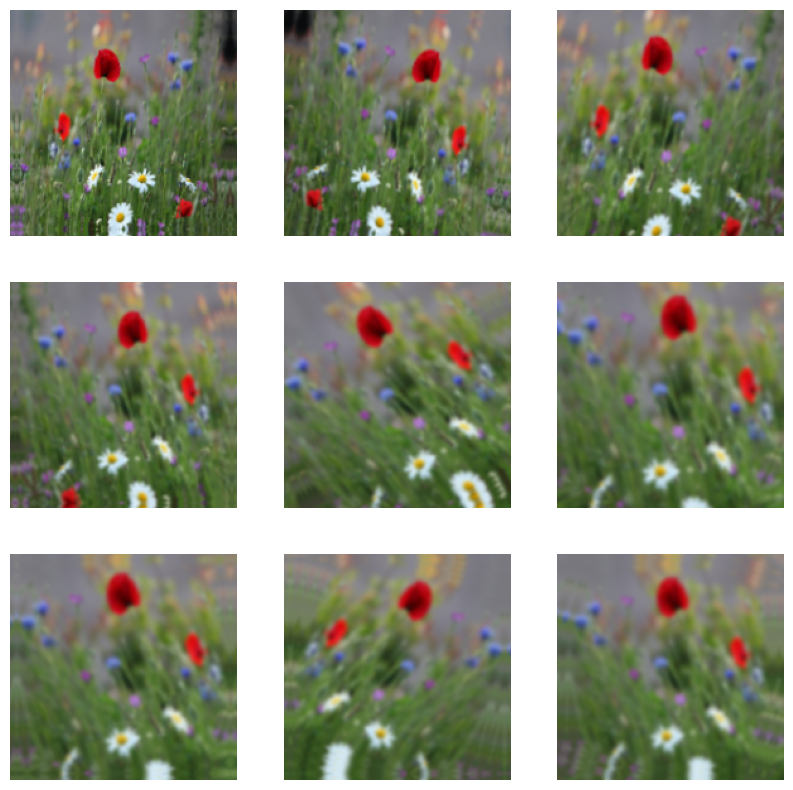

In [33]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

## Model Creation

In [37]:
# convolutional neural network (CNN) model
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.3371 - loss: 1.4936 - val_accuracy: 0.5365 - val_loss: 1.0132
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.5781 - loss: 1.0915 - val_accuracy: 0.7161 - val_loss: 0.7625
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.6356 - loss: 0.9725 - val_accuracy: 0.4438 - val_loss: 1.3571
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.6373 - loss: 0.9278 - val_accuracy: 0.6918 - val_loss: 0.8014
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.6877 - loss: 0.8190 - val_accuracy: 0.6628 - val_loss: 0.8886
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.6841 - loss: 0.7999 - val_accuracy: 0.7520 - val_loss: 0.6930
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.7101 - loss: 0.7473 - val_accuracy: 0.5678 - val_loss: 0.9820
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.7215 - loss: 0.7427 - val_acc

In [41]:
scores = model.evaluate(test_ds)

NameError: name 'test_ds' is not defined

In [42]:
def plot_training_history(history):
    # Plot training and validation accuracy values
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

    # Plot training and validation loss values
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

In [43]:
def evaluate_model(model, val_ds):
    val_loss, val_accuracy = model.evaluate(val_ds)
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Validation Loss: {val_loss:.4f}')

In [44]:
# classify new images and provide meaningful output regarding the predicted class and its associated confidence level.
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [46]:
train_ds, val_ds, flower_names = load_and_preprocess_data(base_dir, image_size, batch_size)
model, history = build_and_train_model(train_ds, val_ds, num_classes, epochs)


Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


NameError: name 'build_and_train_model' is not defined

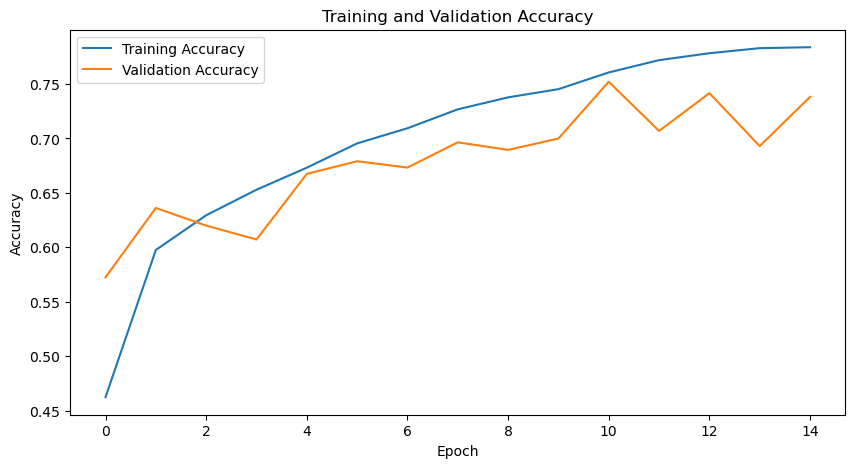

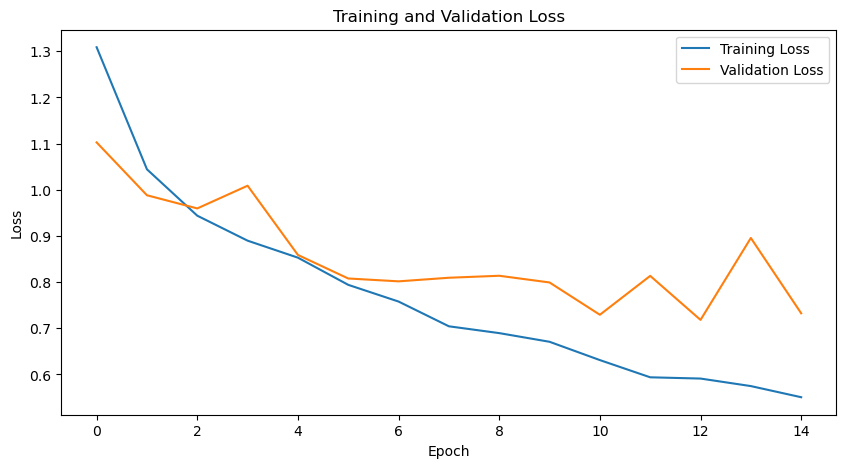

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7405 - loss: 0.6210
Validation Accuracy: 0.7207
Validation Loss: 0.6611
Found 4317 files belonging to 5 classes.
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8294 - loss: 0.5002
Test Accuracy: 0.8006


In [50]:
plot_training_history(history)

# Evaluate model on validation dataset
evaluate_model(model, val_ds)
test_ds = load_test_dataset(test_dir, img_size, batch_size)

# Test the model on a separate test dataset (assuming you have one)
# Replace test_ds with your test dataset
test_accuracy = test_model(model, test_ds)
print(f'Test Accuracy: {test_accuracy:.4f}')

In [ ]:
classify_images('Sample/rose.jpg')

In [ ]:
model.save('Flower_Recog_Model.h5')

first image to predict
actual label: rose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
predicted label: rose


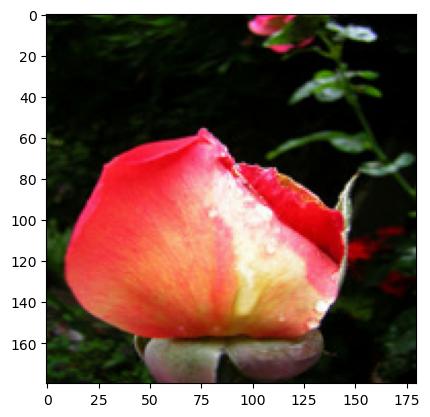

In [82]:
import numpy as np
for images_batch, labels_batch in train_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])] )

In [83]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


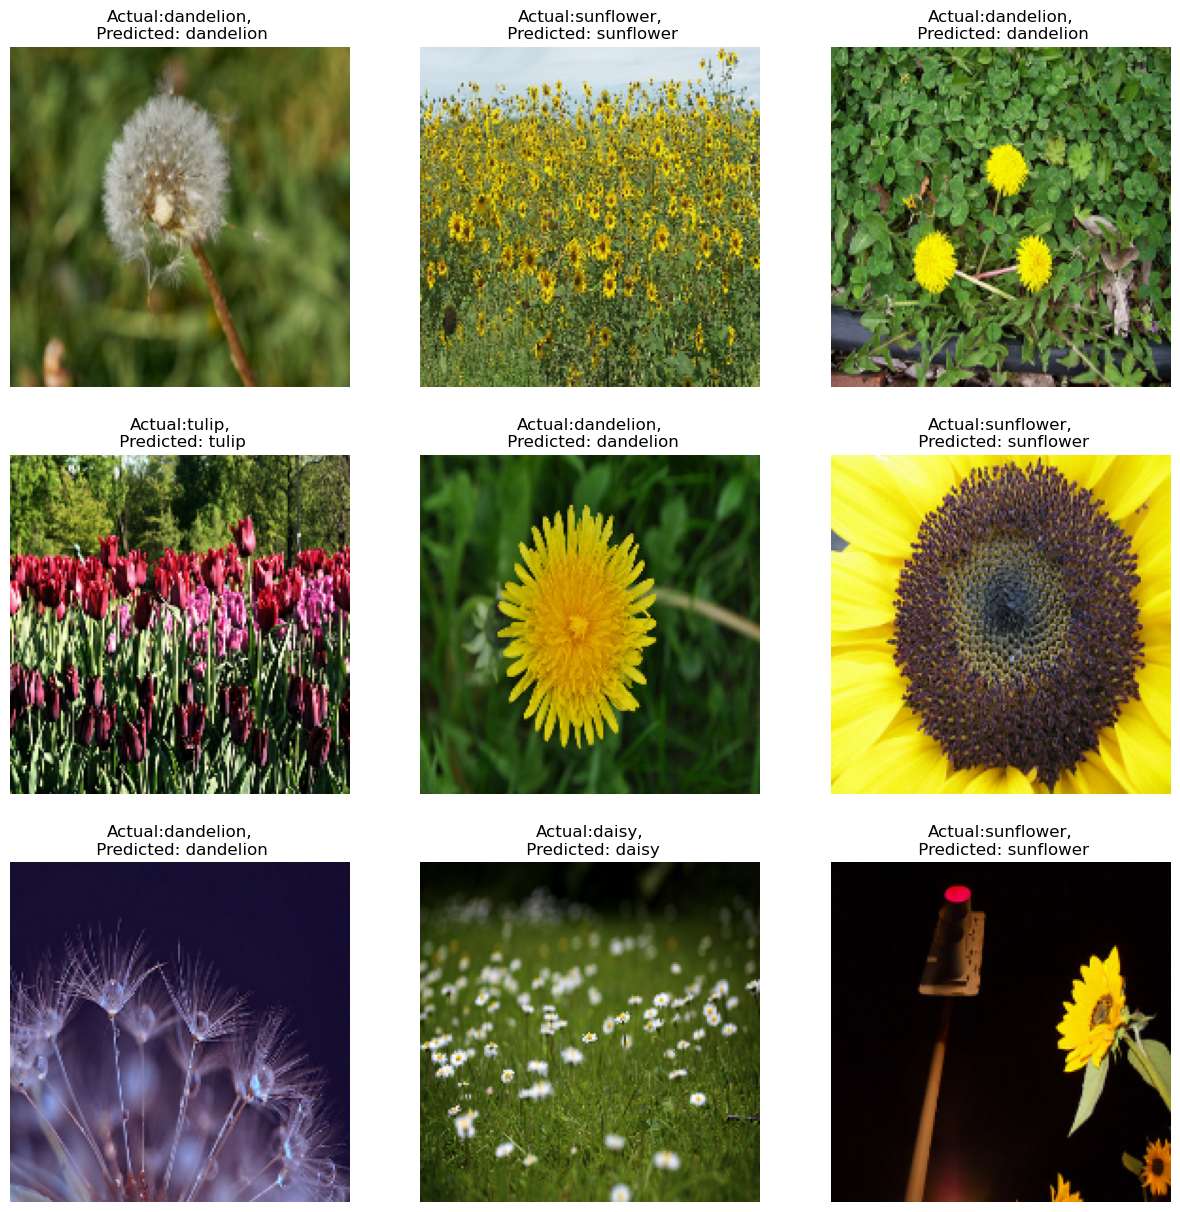

In [85]:
plt.figure(figsize=(15,15))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class= class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}")
#         plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")